In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10, 10)})

In [3]:
df_main = pd.read_csv('../full_adult_clean.csv')
labels = pd.read_csv('../adult_labels.csv')
df_main.head()
df_main.info()
df_main.shape
# read clean data + labels previously saved in KNN lab#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           46033 non-null  int64
 1   educational-num               46033 non-null  int64
 2   gender                        46033 non-null  int64
 3   capital-gain                  46033 non-null  int64
 4   capital-loss                  46033 non-null  int64
 5   hours-per-week                46033 non-null  int64
 6   workclass_Federal-gov         46033 non-null  int64
 7   workclass_Local-gov           46033 non-null  int64
 8   workclass_Private             46033 non-null  int64
 9   workclass_Self-emp-inc        46033 non-null  int64
 10  workclass_Self-emp-not-inc    46033 non-null  int64
 11  workclass_State-gov           46033 non-null  int64
 12  occupation_Adm-clerical       46033 non-null  int64
 13  occupation_Craft-repair       4

(46033, 29)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

def print_results(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred))
    print('precision-score:', precision_score(y_true, y_pred))
    print('recall-score:', recall_score(y_true, y_pred))
    print('roc_auc-score:', roc_auc_score(y_true, y_pred))

def plot_validation_curve(model_grid, param_name, params=None):
    results_df = pd.DataFrame(model_grid.cv_results_)
    
    if params == None:
        plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
    else:
        plt.plot(params, results_df['mean_test_score'])

    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df_main)
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, 
                                             test_size=0.3, random_state=2021)

In [34]:
mlp = MLPClassifier(solver='lbfgs')# quazi-newton
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_valid)
print_results(y_valid, y_pred)

[[9478  847]
 [1323 2162]]
F1-score: 0.6658453957499231
precision-score: 0.7185111332668661
recall-score: 0.6203730272596844
roc_auc-score: 0.7691695644772998


In [35]:
mlp_sgd = MLPClassifier(solver='sgd')# gradient-des
mlp_sgd.fit(X_train, y_train)

y_pred = mlp_sgd.predict(X_valid)
print_results(y_valid, y_pred)

[[9627  698]
 [1302 2183]]
F1-score: 0.6858309770656613
precision-score: 0.7577230128427629
recall-score: 0.6263988522238163
roc_auc-score: 0.7793979733274046


In [6]:
mlp_sgd = MLPClassifier(solver='adam')
mlp_sgd.fit(X_train, y_train)

y_pred = mlp_sgd.predict(X_valid)
print_results(y_valid, y_pred)

[[9589  736]
 [1345 2140]]
F1-score: 0.672850180789184
precision-score: 0.7440890125173852
recall-score: 0.6140602582496413
roc_auc-score: 0.7713884826357165


In [36]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(200,), solver='lbfgs', max_iter=400, alpha=0.1)
mlp_2.fit(X_train, y_train)

y_pred = mlp.predict(X_valid)
print_results(y_pred, y_valid)

[[9478 1323]
 [ 847 2162]]
F1-score: 0.6658453957499231
precision-score: 0.6203730272596844
recall-score: 0.7185111332668661
roc_auc-score: 0.798011237404658


In [37]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
mlp_3 = MLPClassifier(hidden_layer_sizes=(200,), solver='lbfgs', max_iter=400, alpha=0.1)
mlp_3.fit(X_ros, y_ros)

y_pred = mlp_3.predict(X_valid)
print_results(y_pred, y_valid)

[[8452  770]
 [1873 2715]]
F1-score: 0.6726124117428465
precision-score: 0.7790530846484935
recall-score: 0.5917611159546643
roc_auc-score: 0.7541325640497676


In [38]:
mlp_4 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), solver='lbfgs', alpha=0.001)
mlp_4.fit(X_ros, y_ros)

y_pred = mlp_4.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print_results(y_valid, y_pred)

[[8268 2057]
 [ 696 2789]]
[[8268 2057]
 [ 696 2789]]
F1-score: 0.669547473292522
precision-score: 0.5755262071811803
recall-score: 0.800286944045911
roc_auc-score: 0.800530881223924


In [39]:
scaler = StandardScaler()
mlp = MLPClassifier(solver='lbfgs')
model = Pipeline([('scaler', scaler), ('mlp', mlp)])

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print_results(y_valid, y_pred)

[[9488  837]
 [1314 2171]]
[[9488  837]
 [1314 2171]]
F1-score: 0.6687201601724935
precision-score: 0.7217420212765957
recall-score: 0.6229555236728838
roc_auc-score: 0.7709450741851102


In [40]:
param_grid = {'mlp__alpha': np.logspace(-4, 4, 10)}
model_grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'mlp__alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='f1')

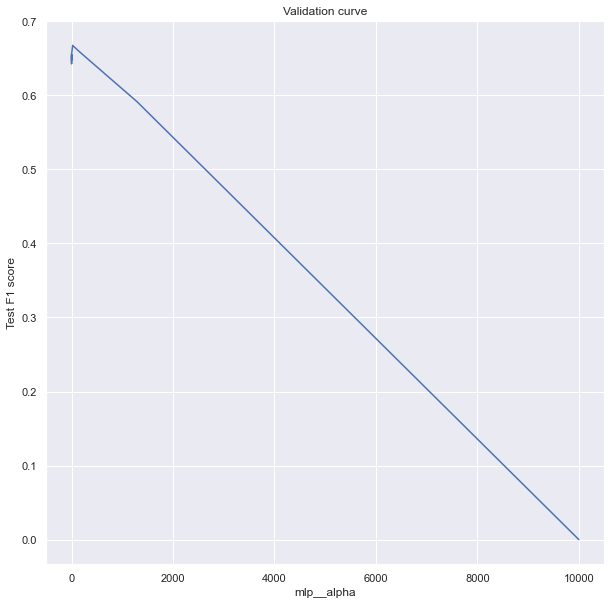

In [41]:
plot_validation_curve(model_grid, 'mlp__alpha')

In [42]:
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print_results(y_valid, y_pred)

Best (hyper)parameters: {'mlp__alpha': 21.54434690031882}
Best score: 0.6674641303665887
[[9617  708]
 [1284 2201]]
[[9617  708]
 [1284 2201]]
F1-score: 0.688457929308727
precision-score: 0.7566173942935717
recall-score: 0.6315638450502152
roc_auc-score: 0.7814962082393934


In [43]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)
model_grid.fit(X_ros, y_ros)
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)

Best (hyper)parameters: {'mlp__alpha': 0.0001}
Best score: 0.8462826548558361


In [44]:
y_pred = model_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print_results(y_valid, y_pred)


[[8335 1990]
 [ 663 2822]]
[[8335 1990]
 [ 663 2822]]
F1-score: 0.6802458720019284
precision-score: 0.586450540315877
recall-score: 0.8097560975609757
roc_auc-score: 0.8085100100395678


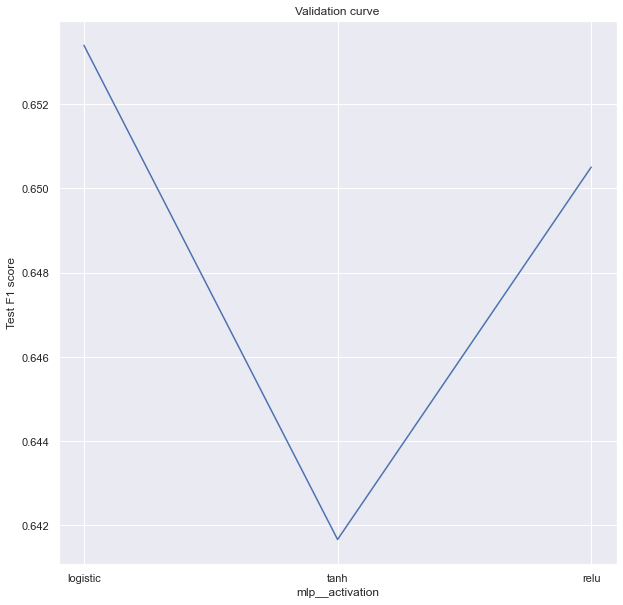

Best (hyper)parameters: {'mlp__activation': 'logistic'}
Best score: 0.6533980044661207
[[22655  1631]
 [ 2730  5207]]
F1-score: 0.704839255499154
precision-score: 0.7614799649020181
recall-score: 0.6560413254378229
roc_auc-score: 0.794441646001461


In [45]:
param_grid = {'mlp__activation': ['logistic', 'tanh', 'relu']}
model_grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', 
                          n_jobs=-1)
model_grid.fit(X_train, y_train)
plot_validation_curve(model_grid, 'mlp__activation')
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_train)
print_results(y_train, y_pred)

In [46]:
param_grid = {'mlp__hidden_layer_sizes': [(i, ) for i in range(20, 500, 20)]}
model_grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'mlp__hidden_layer_sizes': [(20,), (40,), (60,), (80,),
                                                     (100,), (120,), (140,),
                                                     (160,), (180,), (200,),
                                                     (220,), (240,), (260,),
                                                     (280,), (300,), (320,),
                                                     (340,), (360,), (380,),
                                                     (400,), (420,), (440,),
                                                     (460,), (480,)]},
             scoring='f1')

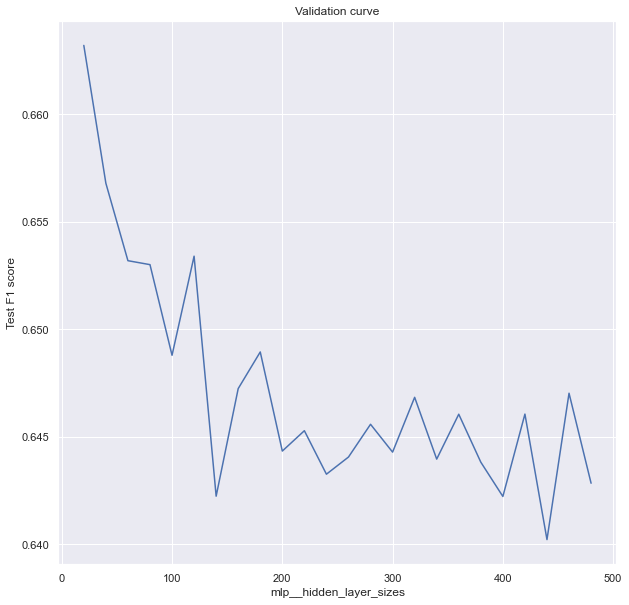

In [47]:
plot_validation_curve(model_grid, 'mlp__hidden_layer_sizes', 
                      [i for i in range(20, 500, 20)])

In [48]:
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_valid)
print_results(y_valid, y_pred)

Best (hyper)parameters: {'mlp__hidden_layer_sizes': (20,)}
Best score: 0.6631902375884012
[[9573  752]
 [1279 2206]]
F1-score: 0.6847741735216514
precision-score: 0.7457741717376606
recall-score: 0.6329985652797705
roc_auc-score: 0.780082817748844


In [49]:
param_grid = {'mlp__warm_start': [True, False]}
model_grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
model_grid.fit(X_train, y_train)
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_valid)
print_results(y_valid, y_pred)

Best (hyper)parameters: {'mlp__warm_start': True}
Best score: 0.6522353350894687
[[9497  828]
 [1282 2203]]
F1-score: 0.6761817065684469
precision-score: 0.7268228307489277
recall-score: 0.6321377331420373
roc_auc-score: 0.7759720142707764


In [50]:
hidden = [(100,), (100, 50), (100, 50, 20), (50, 50), (50, 50, 50), (50, 30, 30, 20)]
param_grid = {'mlp__hidden_layer_sizes': hidden}
model_grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'mlp__hidden_layer_sizes': [(100,), (100, 50),
                                                     (100, 50, 20), (50, 50),
                                                     (50, 50, 50),
                                                     (50, 30, 30, 20)]},
             scoring='f1')

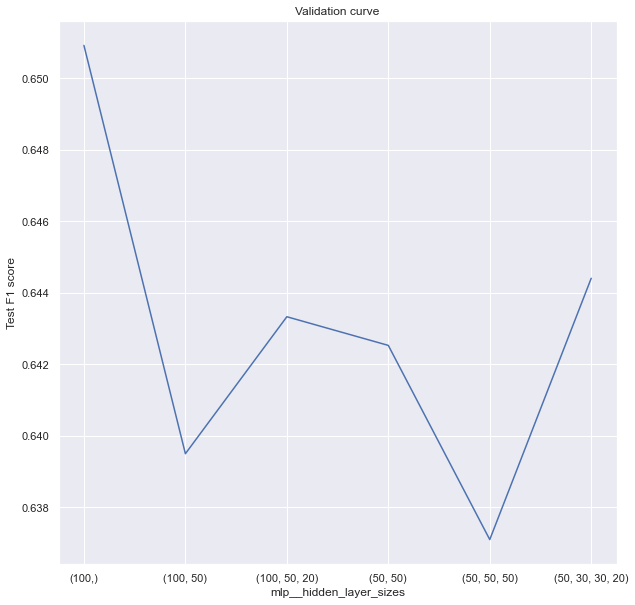

In [51]:
plot_validation_curve(model_grid, 'mlp__hidden_layer_sizes', 
                      [str(x) for x in hidden])

In [52]:
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_valid)
print_results(y_valid, y_pred)

Best (hyper)parameters: {'mlp__hidden_layer_sizes': (100,)}
Best score: 0.6509254952137133
[[9479  846]
 [1300 2185]]
F1-score: 0.6706568446899939
precision-score: 0.720884196634774
recall-score: 0.6269727403156384
roc_auc-score: 0.7725178471553978
